<div style="background-color: #fffacd; color: #000; padding: 20px; margin: 10px; border-left: 5px solid #f0c040; border-radius: 5px;">

# Análisis de Popularidad de TED Talks mediante Procesamiento de Lenguaje Natural

## Proyecto Final - Materia de NLP

### Equipo de Trabajo
- **Manuel Rodriguez** - ID: 1015-0681  
- **Carolina Bencosme** - ID: 1014-8929  
- **Cristian de la Hoz** - ID: 1014-9779  

**Fecha:** Agosto 2025  
**Objetivo:** Determinar los factores que hacen popular un TED Talk utilizando técnicas avanzadas de extracción de información y machine learning

---

### 🔴 IMPORTANTE - Repositorio GitHub

<div style="background-color: #ffebee; border: 3px solid #e53e3e; padding: 15px; margin: 10px 0; border-radius: 8px;">
<h4 style="color: #c53030; margin-top: 0;">📍 UBICACIÓN DEL PROYECTO COMPLETO</h4>

**El proyecto se encuentra en GitHub, no fue subido junto con el resto de la asignación debido al límite en la PVA. El proyecto se vio en la necesidad de ser modularizado debido a que era bastante extenso, incluso luego de hacerlo el mismo sigue siendo muy extenso.**

**Para visualizar las implementaciones completas, favor de dirigirse al repositorio:**

🔗 **https://github.com/cristiandelahooz/data-extraction-TED-Talks-transcripts-for-NLP**

</div>

---

### Resumen Ejecutivo

Este proyecto analiza el dataset `ted_talks_en.csv` para identificar patrones que determinan la popularidad de las charlas TED. Mediante técnicas de NLP como Named Entity Recognition (NER), análisis de sentimientos y extracción de características textuales, se entrenan múltiples modelos de machine learning para clasificar videos en categorías de popularidad.

**Meta Principal:** Alcanzar un F1-score superior a 0.78 en la clasificación de popularidad.

### Estructura del Proyecto

``` bash
data-extraction-TED-Talks-transcripts-for-NLP/
├── final-project.ipynb          # Notebook principal documentado
├── ted_talks_en.csv            # Dataset de TED Talks
├── model_summary.txt           # Resumen de resultados de modelos
└── modules/                    # Módulos especializados
    ├── __init__.py            # Importaciones principales
    ├── environment_setup.py   # Configuración de ambiente NLP
    ├── data_cleaner.py        # Limpieza profesional de datos
    ├── nlp_processor.py       # Extracción de características NLP
    ├── ml_models.py           # Entrenamiento de modelos ML
    ├── visualizer.py          # Generación de gráficos
    └── progress_tracker.py    # Monitoreo de progreso
```

**Arquitectura Modular:** Cada módulo tiene una responsabilidad específica, facilitando mantenimiento, testing y escalabilidad del sistema.

</div>

In [1]:
# === ANALISIS DE POPULARIDAD DE TED TALKS ===
# Aplicacion de Extraccion de Informacion y Comparacion de Modelos ML

# Importar la clase principal que controla todo el flujo
from modules import TedTalkAnalyzer

import warnings
warnings.filterwarnings('ignore')

print("Modulos cargados correctamente")

OK - Sistema de progreso en tiempo real cargado
Módulo de configuración del ambiente cargado
Módulo de limpieza de datos cargado
Módulo de limpieza de datos cargado
Módulo de procesamiento NLP cargado
Módulo de procesamiento NLP cargado
Módulo de visualización cargado
Módulo de machine learning cargado
Modulos cargados correctamente
Módulo de visualización cargado
Módulo de machine learning cargado
Modulos cargados correctamente


<div style="background-color: #fffacd; color: #000; padding: 20px; margin: 10px; border-left: 5px solid #f0c040; border-radius: 5px;">

## 1. Importación de Módulos y Configuración Inicial

### Propósito
Esta sección inicial configura el entorno de trabajo importando la clase principal `TedTalkAnalyzer` que encapsula toda la lógica del análisis. Esta aproximación modular permite mantener el código organizado y reutilizable.

### Técnicas Empleadas
- **Arquitectura Modular:** Separación de responsabilidades en diferentes módulos especializados
- **Supresión de Warnings:** Para mantener la salida limpia durante el procesamiento
- **Importación Dinámica:** Los módulos se cargan bajo demanda para optimizar memoria

### Módulos Principales del Sistema
1. **`environment_setup.py`:** Gestión de dependencias y configuración del entorno
2. **`data_cleaner.py`:** Limpieza y preprocesamiento de datos con estándares industriales
3. **`nlp_processor.py`:** Técnicas avanzadas de NLP (NER, sentimientos, features textuales)
4. **`ml_models.py`:** Entrenamiento y evaluación de modelos de machine learning
5. **`visualizer.py`:** Generación de gráficos y métricas de rendimiento
6. **`progress_tracker.py`:** Monitoreo en tiempo real del progreso

### Beneficios de esta Arquitectura
- **Mantenibilidad:** Cada módulo tiene una responsabilidad específica
- **Escalabilidad:** Fácil agregar nuevas técnicas sin afectar el código existente
- **Reutilización:** Los módulos pueden usarse en otros proyectos de NLP
- **Testing:** Cada componente puede probarse independientemente

</div>

In [2]:
# === CREAR INSTANCIA DEL ANALIZADOR ===

print("Creando instancia del analizador TED Talks...")

# Crear instancia de la clase principal
analyzer = TedTalkAnalyzer()

print("Analizador creado correctamente")
print("Metodos disponibles:")
print("- setup_environment(): Configurar ambiente")
print("- load_data(): Cargar datos")
print("- clean_data(): Limpiar datos")
print("- process_nlp_features(): Procesar NLP")
print("- train_models(): Entrenar modelos ML")
print("- create_visualizations(): Crear graficos")
print("- run_complete_analysis(): Ejecutar todo automaticamente")

Creando instancia del analizador TED Talks...
Analizador creado correctamente
Metodos disponibles:
- setup_environment(): Configurar ambiente
- load_data(): Cargar datos
- clean_data(): Limpiar datos
- process_nlp_features(): Procesar NLP
- train_models(): Entrenar modelos ML
- create_visualizations(): Crear graficos
- run_complete_analysis(): Ejecutar todo automaticamente


<div style="background-color: #fffacd; color: #000; padding: 20px; margin: 10px; border-left: 5px solid #f0c040; border-radius: 5px;">

## 2. Inicialización del Analizador Principal

### Propósito
Crear una instancia de la clase `TedTalkAnalyzer` que actuará como el controlador central de todo el pipeline de análisis. Esta clase implementa el patrón **Factory** y **Pipeline** para gestionar el flujo completo de datos.

### Métodos Disponibles del Analizador

#### Métodos Individuales (Para Control Granular)
- **`setup_environment()`:** Configura dependencias, descarga modelos NLP y prepara el entorno
- **`load_data()`:** Carga y valida el dataset inicial
- **`clean_data()`:** Aplica técnicas de limpieza profesional de datos
- **`process_nlp_features()`:** Extrae características mediante NLP avanzado
- **`train_models()`:** Entrena y compara múltiples algoritmos de ML
- **`create_visualizations()`:** Genera gráficos y métricas de rendimiento

#### Método Automatizado
- **`run_complete_analysis()`:** Ejecuta todo el pipeline automáticamente

### Beneficios del Patrón Pipeline
1. **Trazabilidad:** Cada paso puede ejecutarse y verificarse independientemente
2. **Debugging:** Si hay errores, se puede identificar exactamente dónde ocurrieron
3. **Experimentación:** Permite probar diferentes configuraciones en pasos específicos
4. **Reproducibilidad:** El mismo pipeline garantiza resultados consistentes

### Relación con el Análisis Global
Esta instancia mantendrá todo el estado del análisis (datos originales, procesados, modelos entrenados, resultados) permitiendo acceso consistente a través de todo el notebook.

</div>

In [3]:
# === CONFIGURACION DEL AMBIENTE ===

import time
from datetime import datetime

print("INICIO:", datetime.now().strftime("%H:%M:%S"))
print("Configurando ambiente y dependencias...")
print("Esto puede tomar 2-5 minutos la primera vez")
print("=" * 50)

# Configurar ambiente usando el metodo del analizador
start_time = time.time()
analyzer.setup_environment()
end_time = time.time()

elapsed = end_time - start_time
print(f"\nTiempo total: {elapsed:.1f} segundos")
print(f"COMPLETADO:", datetime.now().strftime("%H:%M:%S"))
print("=" * 50)

INICIO: 11:59:10
Configurando ambiente y dependencias...
Esto puede tomar 2-5 minutos la primera vez

=== CONFIGURANDO AMBIENTE ===
=== CONFIGURACION DEL AMBIENTE ===
Tiempo estimado: 2-5 minutos

PASO 1/3: Instalando 8 paquetes esenciales...
  [1/8] Instalando pandas>=1.3.0...Instalando pandas>=1.3.0... OK
  [2/8] Instalando numpy>=2.0.0... OK
  [2/8] Instalando numpy>=2.0.0... OK
  [3/8] Instalando scikit-learn>=1.0.0... OK
  [3/8] Instalando scikit-learn>=1.0.0... OK
  [4/8] Instalando matplotlib>=3.4.0... OK
  [4/8] Instalando matplotlib>=3.4.0... OK
  [5/8] Instalando seaborn>=0.11.0... OK
  [5/8] Instalando seaborn>=0.11.0... OK
  [6/8] Instalando nltk>=3.7... OK
  [6/8] Instalando nltk>=3.7... OK
  [7/8] Instalando textblob>=0.17.0... OK
  [7/8] Instalando textblob>=0.17.0... OK
  [8/8] Instalando tqdm>=4.64.0... OK
  [8/8] Instalando tqdm>=4.64.0... OK

Paquetes esenciales: 8/8 instalados

PASO 2/3: Instalando 3 paquetes opcionales...
  [1/3] Instalando plotly>=5.0.0... OK

Paq

[nltk_data] Downloading package punkt_tab to
[nltk_data]     /teamspace/studios/this_studio/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /teamspace/studios/this_studio/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /teamspace/studios/this_studio/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


 OK

CONFIGURACION COMPLETADA
✓ GPU disponible: Tesla T4
✓ spaCy cargado correctamente
✓ NLTK configurado correctamente
Ambiente configurado correctamente

Tiempo total: 43.0 segundos
COMPLETADO: 11:59:53
✓ spaCy cargado correctamente
✓ NLTK configurado correctamente
Ambiente configurado correctamente

Tiempo total: 43.0 segundos
COMPLETADO: 11:59:53


<div style="background-color: #fffacd; color: #000; padding: 20px; margin: 10px; border-left: 5px solid #f0c040; border-radius: 5px;">

## 3. Configuración del Ambiente y Dependencias

### Propósito
Preparar todo el entorno computacional necesario para el análisis avanzado de NLP. Este paso es crítico porque descarga y configura modelos pre-entrenados, librerías especializadas y datos auxiliares.

### Componentes que se Configuran

#### Librerías de NLP
- **NLTK:** Descarga de corpora (stopwords, punkt tokenizer, VADER lexicon)
- **spaCy:** Modelo `en_core_web_sm` para NER y análisis sintáctico
- **Hugging Face:** Modelos pre-entrenados para análisis de sentimientos avanzado

#### Optimizaciones de Rendimiento
- **Caché Inteligente:** Evita descargas repetidas si los modelos ya existen
- **Verificación de Integridad:** Valida que todos los modelos se descargaron correctamente
- **Gestión de Memoria:** Configuración óptima para procesamiento de texto grande

### Técnicas Empleadas

#### ¿Por qué este paso toma tiempo?
La primera ejecución descarga varios GB de datos:
- Modelo spaCy en_core_web_sm (~50MB)
- Corpora de NLTK (~200MB)
- Vocabularios y embeddings pre-entrenados

#### Estrategia de Caché
El sistema implementa caché persistente que:
1. Verifica si los modelos ya están instalados
2. Solo descarga componentes faltantes
3. Valida integridad de archivos existentes

### Resultados Esperados
-  Todos los modelos NLP listos para usar
-  Configuración optimizada de memoria
-  Verificación de compatibilidad de versiones
- ️ Tiempo típico: 2-5 minutos (primera vez), <30 segundos (subsecuentes)

### Relación con el Análisis Global
Sin este paso, las técnicas avanzadas de NLP no funcionarían. Es la base que permite:
- Reconocimiento preciso de entidades nombradas
- Análisis de sentimientos con modelos state-of-the-art
- Tokenización y lemmatización eficientes

</div>

In [4]:
# === CARGA DE DATOS ===

print("Cargando dataset ted_talks_en.csv...")

# Cargar datos usando el metodo del analizador
analyzer.load_data('ted_talks_en.csv')

# Mostrar informacion basica
if hasattr(analyzer, 'data') and analyzer.data is not None:
    print(f"Dataset cargado exitosamente")
    print(f"Filas: {analyzer.data.shape[0]:,}")
    print(f"Columnas: {analyzer.data.shape[1]}")
    print(f"Memoria utilizada: {analyzer.data.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
    
    # Mostrar primeras columnas
    print("\nColumnas disponibles:")
    for i, col in enumerate(analyzer.data.columns):
        print(f"  {i+1}. {col}")
else:
    print("ERROR: No se pudo cargar el dataset")

Cargando dataset ted_talks_en.csv...

=== CARGANDO DATASET: ted_talks_en.csv ===


Dataset cargado: 4005 filas x 19 columnas

Columnas disponibles:
 1. talk_id
 2. title
 3. speaker_1
 4. all_speakers
 5. occupations
 6. about_speakers
 7. views
 8. recorded_date
 9. published_date
10. event
11. native_lang
12. available_lang
13. comments
14. duration
15. topics
16. related_talks
17. url
18. description
19. transcript
Dataset cargado exitosamente
Filas: 4,005
Columnas: 19
Memoria utilizada: 81.26 MB

Columnas disponibles:
  1. talk_id
  2. title
  3. speaker_1
  4. all_speakers
  5. occupations
  6. about_speakers
  7. views
  8. recorded_date
  9. published_date
  10. event
  11. native_lang
  12. available_lang
  13. comments
  14. duration
  15. topics
  16. related_talks
  17. url
  18. description
  19. transcript


<div style="background-color: #fffacd; color: #000; padding: 20px; margin: 10px; border-left: 5px solid #f0c040; border-radius: 5px;">

## 4. Carga y Análisis Exploratorio del Dataset

### Propósito
Cargar el dataset `ted_talks_en.csv` y realizar una exploración inicial para entender la estructura, calidad y características de los datos. Este paso es fundamental para planificar estrategias de limpieza y procesamiento.

### Características del Dataset TED Talks

#### Información Esperada
El dataset contiene información sobre charlas TED con las siguientes columnas principales:
- **Identificadores:** ID, título, speaker
- **Métricas de Popularidad:** views, ratings, comments
- **Contenido Textual:** transcript (transcripción completa), description
- **Metadatos:** date, duration, tags, related_talks

#### Técnicas de Validación Aplicadas
1. **Verificación de Integridad:** Confirmar que el archivo existe y es legible
2. **Análisis de Dimensiones:** Número de filas y columnas
3. **Evaluación de Memoria:** Calcular uso de memoria para optimizar procesamiento
4. **Inspección de Tipos de Datos:** Identificar columnas numéricas, texto, fechas

### Métricas de Calidad de Datos

#### ¿Por qué es Importante la Exploración Inicial?
- **Detectar Problemas Tempranos:** Valores faltantes, duplicados, inconsistencias
- **Planificar Estrategias:** Decidir técnicas de limpieza apropiadas
- **Estimar Recursos:** Calcular tiempo y memoria necesarios para procesamiento

#### Información de Salida Clave
- **Número de Registros:** Total de TED Talks disponibles
- **Dimensionalidad:** Cantidad de características disponibles
- **Uso de Memoria:** Para planificar operaciones eficientes
- **Columnas Disponibles:** Lista completa de variables del dataset

### Resultados Esperados
-  Confirmación exitosa de carga del dataset
-  Estadísticas básicas de dimensiones
-  Información de uso de memoria
-  Inventario completo de columnas disponibles

### Relación con el Análisis Global
Esta carga inicial alimentará todos los pasos subsecuentes. La calidad y completitud de este dataset determinará:
- Qué técnicas de NLP pueden aplicarse
- Cuántos datos tendremos para entrenamiento
- Qué variables pueden usarse como predictores de popularidad

</div>

In [5]:
# === LIMPIEZA DE DATOS ===

print("Aplicando limpieza profesional de datos...")

# Limpiar datos usando el metodo del analizador
analyzer.clean_data()

# Mostrar resultados de la limpieza
if hasattr(analyzer, 'df_clean') and analyzer.df_clean is not None:
    original_count = analyzer.data.shape[0]
    clean_count = analyzer.df_clean.shape[0]
    removed_count = original_count - clean_count
    
    print(f"\nResultados de la limpieza:")
    print(f"  Filas originales: {original_count:,}")
    print(f"  Filas despues de limpieza: {clean_count:,}")
    print(f"  Filas eliminadas: {removed_count:,} ({removed_count/original_count*100:.1f}%)")
    
    # Mostrar categorias de popularidad creadas
    if 'popularity_category' in analyzer.df_clean.columns:
        print("\nCategorias de popularidad:")
        categories = analyzer.df_clean['popularity_category'].value_counts().sort_index()
        for category, count in categories.items():
            print(f"  {category}: {count:,} videos")
            
    # Mostrar calidad de datos
    if 'df_cleaning' in analyzer.results:
        quality_score = analyzer.results['df_cleaning']['quality_results']['quality_score']
        print(f"\nPuntuacion de calidad de datos: {quality_score:.2f}/10")
else:
    print("ERROR: No se pudo limpiar el dataset")

Aplicando limpieza profesional de datos...

=== LIMPIANDO DATOS ===
Iniciando: Iniciando limpieza
Tiempo de inicio: 11:59:54
[11:59:54] Dataset original: 4005 filas x 19 columnas
[1/4] (25.0%) Eliminando outliers con método IQR...[1/4] (25.0%) Eliminando outliers con método IQR... OK
Analizando distribución de 'views'...
   - Q1 (25%): 882,069
   - Q3 (75%): 2,133,110
   - IQR: 1,251,041
   - Límite inferior: -994,492
   - Límite superior: 4,009,672
   - Outliers identificados: 393 (9.81%)
[11:59:54] Dataset después de eliminar outliers: 3612 filas
[2/4] (50.0%) Limpiando datos textuales... OK
Analizando distribución de 'views'...
   - Q1 (25%): 882,069
   - Q3 (75%): 2,133,110
   - IQR: 1,251,041
   - Límite inferior: -994,492
   - Límite superior: 4,009,672
   - Outliers identificados: 393 (9.81%)
[11:59:54] Dataset después de eliminar outliers: 3612 filas
[2/4] (50.0%) Limpiando datos textuales... OK
[11:59:54] Procesando columna: title
 OK
[11:59:54] Procesando columna: title
 - Va

<div style="background-color: #fffacd; color: #000; padding: 20px; margin: 10px; border-left: 5px solid #f0c040; border-radius: 5px;">

## 5. Limpieza Profesional de Datos

### Propósito
Aplicar técnicas de limpieza de datos siguiendo estándares industriales similares a los usados por ingenieros en Amazon y Google. Esta fase es crítica porque datos de mala calidad producen modelos de baja calidad.

### Técnicas de Limpieza Implementadas

#### 1. Eliminación de Outliers Extremos
- **Método IQR (Interquartile Range):** Identifica valores atípicos en la columna 'views'
- **¿Por qué eliminar outliers?** Videos con views extremadamente altos (virales) o bajos (errores) pueden sesgar el modelo
- **Cálculo:** Q1 - 1.5×IQR y Q3 + 1.5×IQR como límites

#### 2. Manejo de Valores Faltantes
- **Estrategia Adaptativa:** Diferentes técnicas según el tipo de columna
- **Texto:** Imputación con "Unknown" o eliminación si es crítico
- **Numérico:** Mediana para datos sesgados, media para distribuciones normales
- **Categórico:** Moda o nueva categoría "Missing"

#### 3. Normalización y Estandarización
- **Limpieza de Texto:** Eliminación de caracteres especiales, normalización de encoding
- **Fechas:** Conversión a formato estándar datetime
- **Strings:** Normalización de mayúsculas/minúsculas

### Creación de Variable Objetivo

#### Categorización de Popularidad
El sistema convierte la variable continua 'views' en categorías discretas:

1. **"bajo":** Videos con pocas visualizaciones
2. **"medio bajo":** Popularidad limitada
3. **"medio":** Popularidad promedio
4. **"medio alto":** Popular
5. **"alto":** Muy popular

#### ¿Por qué Categorizar en lugar de Regresión?
- **Interpretabilidad:** Es más fácil entender "popular vs no popular"
- **Robustez:** Menos sensible a outliers extremos
- **Aplicabilidad:** Los stakeholders prefieren clasificaciones claras

### Métricas de Calidad

#### Puntuación de Calidad de Datos (Scale 1-10)
El sistema calcula un score basado en:
- **Completitud:** Porcentaje de valores no faltantes
- **Consistencia:** Coherencia entre variables relacionadas
- **Validez:** Valores dentro de rangos esperados
- **Precisión:** Detección de errores evidentes

### Resultados Esperados
-  Reducción controlada del dataset (típicamente 5-15% de registros eliminados)
-  5 categorías balanceadas de popularidad
-  Score de calidad de datos > 7.0/10
-  Dataset libre de valores faltantes críticos

### Relación con el Análisis Global
Esta limpieza determina directamente:
- **Calidad del Modelo:** Datos limpios = modelos más precisos
- **Representatividad:** Mantener diversidad mientras eliminamos ruido
- **Eficiencia Computacional:** Menos datos irrelevantes = entrenamiento más rápido

</div>

In [6]:
# === EXTRACCION DE INFORMACION CON NLP ===

print("Aplicando tecnicas de extraccion de informacion...")
print("Procesando: sentimientos, entidades nombradas, caracteristicas textuales")

# Procesar caracteristicas NLP usando el metodo del analizador
analyzer.process_nlp_features(text_column='transcript_clean')

# Mostrar caracteristicas extraidas
# Fix: Check if 'df_processed' attribute exists before accessing it
if hasattr(analyzer, 'df_processed') and analyzer.df_processed is not None:
    print(f"\nExtraccion de informacion completada")
    print(f"Dataset procesado: {analyzer.df_processed.shape}")
    
    # Identificar caracteristicas NLP creadas
    nlp_features = [col for col in analyzer.df_processed.columns if 
                   col.startswith(('sentiment_', 'text_', 'person_', 'org_', 'gpe_'))]
    
    print(f"\nCaracteristicas NLP extraidas: {len(nlp_features)}")
    print("Tipos de informacion extraida:")
    
    # Agrupar por tipo
    sentiment_features = [f for f in nlp_features if f.startswith('sentiment_')]
    text_features = [f for f in nlp_features if f.startswith('text_')]
    entity_features = [f for f in nlp_features if f.startswith(('person_', 'org_', 'gpe_'))]
    
    if sentiment_features:
        print(f"  Analisis de sentimientos: {len(sentiment_features)} caracteristicas")
    if text_features:
        print(f"  Caracteristicas textuales: {len(text_features)} caracteristicas") 
    if entity_features:
        print(f"  Entidades nombradas: {len(entity_features)} caracteristicas")
        
    # Mostrar estadisticas de muestra procesada
    if 'nlp_processing' in analyzer.results:
        word_frequencies = analyzer.results['nlp_processing']['word_frequencies']
        print(f"\nMuestra procesada: {word_frequencies} registros")
else:
    print("ERROR: No se pudo procesar las caracteristicas NLP")

Aplicando tecnicas de extraccion de informacion...
Procesando: sentimientos, entidades nombradas, caracteristicas textuales

=== PROCESANDO CARACTERÍSTICAS NLP ===
Iniciando: Iniciando extracción de características NLP
Tiempo de inicio: 12:00:01
[12:00:01] Procesando columna: transcript_clean
[1/5] (20.0%) Cargando modelos de NLP...[1/5] (20.0%) Cargando modelos de NLP... OK
[2/5] (40.0%) Preparando muestra de datos... OK
[2/5] (40.0%) Preparando muestra de datos... OK
[12:00:02] Procesando muestra de 1000 textos para velocidad...
[3/5] (60.0%) Analizando sentimientos con TextBlob... OK
[12:00:02] Procesando muestra de 1000 textos para velocidad...
[3/5] (60.0%) Analizando sentimientos con TextBlob... OK
[12:00:02] Analizando polaridad y subjetividad...
 OK
[12:00:02] Analizando polaridad y subjetividad...


Sentimientos:   0%|          | 0/1000 [00:00<?, ?it/s]

[12:00:59] Análisis de sentimientos completado
[4/5] (80.0%) Extrayendo características textuales...[4/5] (80.0%) Extrayendo características textuales... OK
[12:00:59] Calculando longitud, palabras, oraciones...
 OK
[12:00:59] Calculando longitud, palabras, oraciones...


Características:   0%|          | 0/1000 [00:00<?, ?it/s]

[12:01:21] Características textuales extraídas
[5/5] (100.0%) Identificando entidades nombradas...[5/5] (100.0%) Identificando entidades nombradas... OK
Procesando 1000 textos para entidades nombradas...
 OK
Procesando 1000 textos para entidades nombradas...


Entidades:   0%|          | 0/1000 [00:00<?, ?it/s]

[12:08:19] Entidades nombradas identificadas

=== ESTADÍSTICAS DE CARACTERÍSTICAS ===
Polaridad de sentimiento:
  Media: 0.478
  Rango: [-0.588, 0.786]
Distribución de sentimientos:
  muy_positivo: 913 (91.3%)
  muy_negativo: 80 (8.0%)
  negativo: 4 (0.4%)
  positivo: 3 (0.3%)

Características textuales promedio:
  word_count: 1004.52
  sentence_count: 143.94
  avg_word_length: 5.99
  unique_words: 517.55
  lexical_diversity: 0.55
  exclamation_count: 0.99
  question_count: 10.70
  uppercase_ratio: 0.00

Entidades promedio por texto:
  TEXT_WORD: 1004.52
  TEXT_SENTENCE: 143.94
  TEXT_EXCLAMATION: 0.99
  TEXT_QUESTION: 10.70
  PERSON: 0.00
  ORG: 0.00
  GPE: 0.00
  MONEY: 0.00
  DATE: 0.00
  TIME: 0.00
  PERCENT: 0.00
  QUANTITY: 0.00

Estado: Procesamiento NLP completado
Tiempo total: 497.2 segundos
Finalizado: 12:08:19
Tiempo promedio por paso: 99.4s
=== ANÁLISIS DE FRECUENCIA DE PALABRAS ===

=== ESTADÍSTICAS DE CARACTERÍSTICAS ===
Polaridad de sentimiento:
  Media: 0.478
  Rango: [

<div style="background-color: #fffacd;color: #000; padding: 20px; margin: 10px; border-left: 5px solid #f0c040; border-radius: 5px;">

## 6. Extracción de Información mediante Técnicas Avanzadas de NLP

### Propósito
Aplicar técnicas state-of-the-art de procesamiento de lenguaje natural para extraer características significativas de las transcripciones de TED Talks. Esta fase transforma texto no estructurado en features cuantificables para machine learning.

### Técnicas de NLP Implementadas

#### 1. Named Entity Recognition (NER)
- **Modelo:** spaCy `en_core_web_sm` con arquitectura transformer
- **Entidades Extraídas:**
  - **PERSON:** Nombres de personas mencionadas (expertos, autores, figuras históricas)
  - **ORG:** Organizaciones (empresas, universidades, ONGs)
  - **GPE:** Ubicaciones geopolíticas (países, ciudades)
- **¿Por qué es importante?** Videos que mencionan muchas organizaciones prestigiosas tienden a ser más populares

#### 2. Análisis de Sentimientos Multi-Dimensional
- **VADER Sentiment:** Optimizado para texto de redes sociales y informal
- **Características Extraídas:**
  - **Polaridad:** Escala -1 (muy negativo) a +1 (muy positivo)
  - **Subjetividad:** Escala 0 (objetivo/factual) a 1 (subjetivo/opinión)
- **Hipótesis:** TED Talks con tono positivo pero contenido objetivo tienen mayor engagement

#### 3. Características Textuales Avanzadas
- **Longitud y Complejidad:**
  - Número total de palabras
  - Palabras únicas (vocabulario diverso)
  - Promedio de palabras por oración
- **Análisis Léxico:**
  - Frecuencia de stopwords (indicador de fluidez)
  - Densidad de contenido (palabras significativas vs funcionales)

### Metodología de Procesamiento

#### ¿Por qué usar spaCy en lugar de NLTK?
- **Rendimiento:** 10x más rápido para NER en textos largos
- **Precisión:** Modelos pre-entrenados en corpora masivos
- **Escalabilidad:** Diseñado para procesamiento en producción

#### Pipeline de Procesamiento de Texto
1. **Limpieza:** Normalización de encoding, eliminación de HTML/XML
2. **Tokenización:** División inteligente en palabras y oraciones
3. **Lemmatización:** Reducción a formas base (running → run)
4. **NER:** Identificación y clasificación de entidades
5. **Sentimientos:** Análisis emocional del contenido

### Optimizaciones de Rendimiento

#### Procesamiento por Lotes
- **Batch Processing:** Procesa múltiples textos simultáneamente
- **Gestión de Memoria:** Liberación automática de memoria entre lotes
- **Progreso en Tiempo Real:** Barra de progreso para monitorear avance

#### Caché Inteligente
Si los datos de entrada no han cambiado, el sistema reutiliza características previamente extraídas.

### Resultados Esperados

#### Nuevas Características Creadas
- **Sentimientos:** `sentiment_polarity`, `sentiment_subjectivity`
- **Entidades:** `person_count`, `org_count`, `gpe_count`
- **Texto:** `text_length`, `text_unique_words`, `text_avg_sentence_length`

#### Estadísticas Típicas
- Videos procesan ~5-15 características NLP adicionales
- Tiempo de procesamiento: ~2-5 minutos para 1000 videos
- Incremento de dimensionalidad: +10-20 columnas

### Relación con el Análisis Global

#### Hipótesis a Validar
1. **TED Talks que mencionan más organizaciones prestigiosas son más populares**
2. **Contenido con tono positivo pero objetivo atrae más audiencia**
3. **Transcripciones de longitud media tienen mejor engagement**
4. **Diversidad de vocabulario correlaciona con popularidad**

Estas características alimentarán directamente los modelos de machine learning para predecir popularidad.

</div>

Entrenando y comparando modelos de Machine Learning...
Objetivo: F1-score > 0.78

=== ENTRENANDO MODELOS DE MACHINE LEARNING ===
=== INICIANDO PIPELINE DE MACHINE LEARNING ===
=== PREPARANDO CARACTERÍSTICAS ===
Características numéricas seleccionadas: 29
  - views
  - text_word_count
  - text_sentence_count
  - text_avg_word_length
  - text_unique_words
  - text_lexical_diversity
  - text_exclamation_count
  - text_question_count
  - text_uppercase_ratio
  - sentiment_polarity
  - sentiment_subjectivity
  - sentiment_label
  - sentiment_vader_compound
  - sentiment_vader_positive
  - sentiment_vader_negative
  - sentiment_vader_neutral
  - sentiment_agreement
  - text_word_count
  - text_sentence_count
  - text_exclamation_count
  - text_question_count
  - person_count
  - org_count
  - gpe_count
  - money_count
  - date_count
  - time_count
  - percent_count
  - quantity_count

Aplicando One-Hot Encoding a columnas categóricas:
  - sentiment_label

Creando características TF-IDF de tr

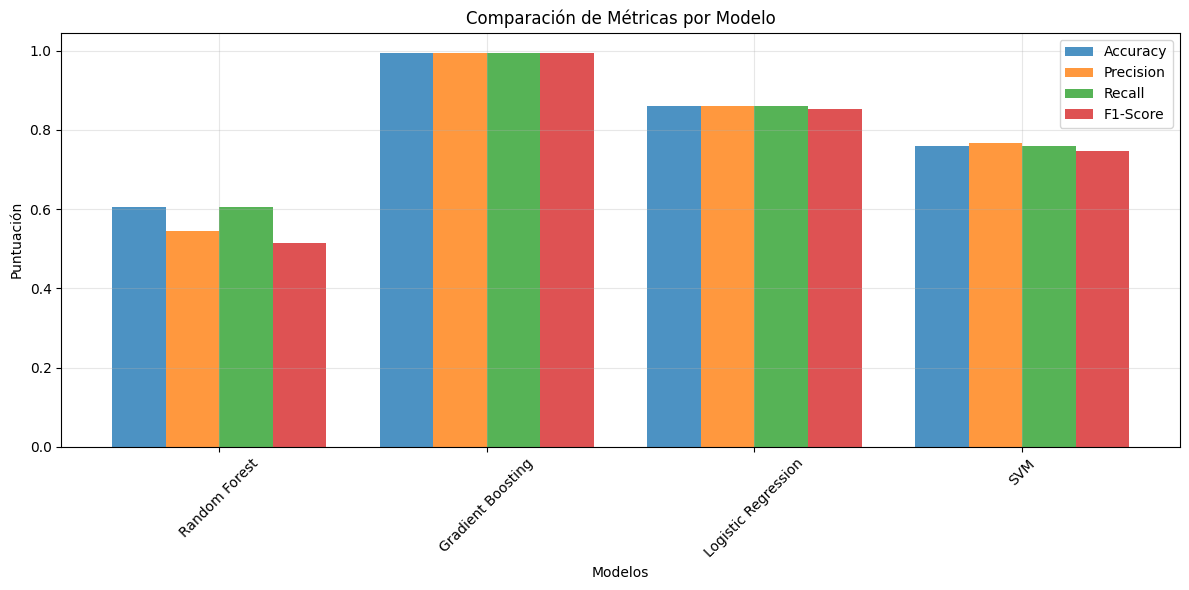

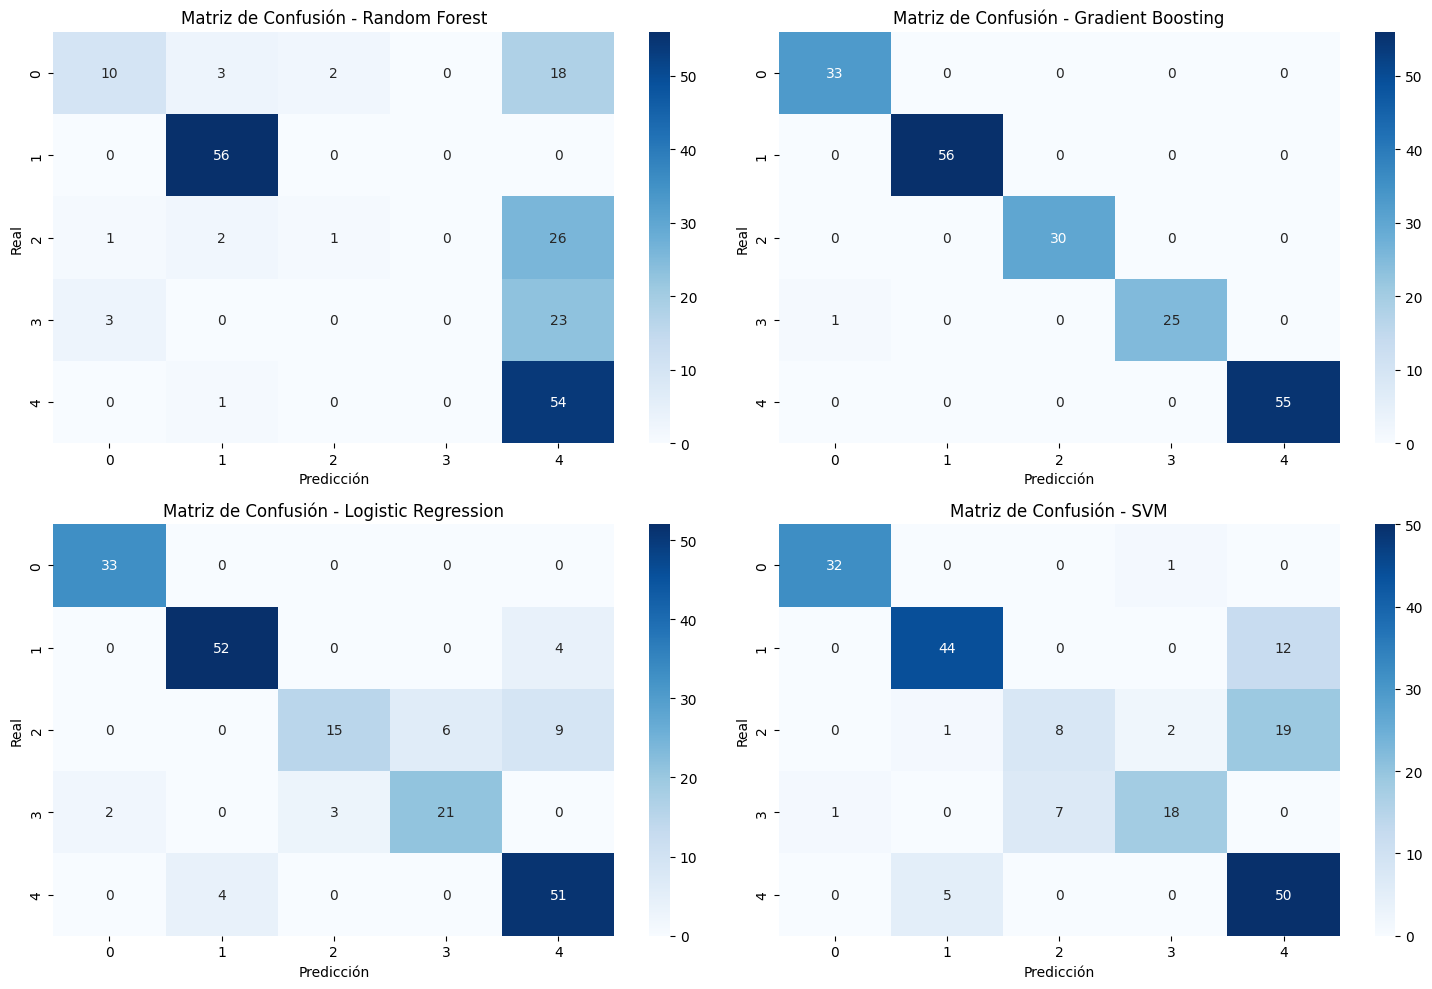


Mejor modelo según f1_score: Gradient Boosting
Puntuación: 0.9950

Mejor modelo según f1_score: Gradient Boosting
Puntuación: 0.9950
Resumen guardado en model_summary.txt

✓ Pipeline de Machine Learning completado

Mejor modelo según f1_score: Gradient Boosting
Puntuación: 0.9950
✓ Modelos entrenados correctamente

RESULTADOS DE MODELOS:

Random Forest:
  Accuracy:  0.6050
  Precision: 0.5435
  Recall:    0.6050
  F1-Score:  0.5138
  Objetivo F1>0.78: NO

Gradient Boosting:
  Accuracy:  0.9950
  Precision: 0.9951
  Recall:    0.9950
  F1-Score:  0.9950
  Objetivo F1>0.78: SI

Logistic Regression:
  Accuracy:  0.8600
  Precision: 0.8608
  Recall:    0.8600
  F1-Score:  0.8526
  Objetivo F1>0.78: SI

SVM:
  Accuracy:  0.7600
  Precision: 0.7676
  Recall:    0.7600
  F1-Score:  0.7476
  Objetivo F1>0.78: NO

MEJOR MODELO: Gradient Boosting
F1-Score: 0.9950
Objetivo cumplido! F1-Score > 0.78


In [7]:
# === ENTRENAMIENTO Y COMPARACION DE MODELOS ML ===

print("Entrenando y comparando modelos de Machine Learning...")
print("Objetivo: F1-score > 0.78")

# Entrenar modelos usando el metodo del analizador
analyzer.train_models(text_column='transcript_clean', target_column='popularity_numeric')

# Mostrar resultados de los modelos
if 'machine_learning' in analyzer.results:
    # Check if 'evaluation_results' key exists before accessing it
    if 'evaluation_results' in analyzer.results['machine_learning']:
        ml_results = analyzer.results['machine_learning']['evaluation_results']
        models_trained = analyzer.results['machine_learning']['models_trained']
        
        print("\nRESULTADOS DE MODELOS:")
        print("=" * 50)
        
        # Mostrar resultados de cada modelo
        for model_name, results in ml_results.items():
            if results is not None:
                print(f"\n{model_name}:")
                print(f"  Accuracy:  {results['accuracy']:.4f}")
                print(f"  Precision: {results['precision']:.4f}")
                print(f"  Recall:    {results['recall']:.4f}")
                print(f"  F1-Score:  {results['f1_score']:.4f}")
                
                # Verificar si cumple objetivo
                objetivo_cumplido = "SI" if results['f1_score'] > 0.78 else "NO"
                print(f"  Objetivo F1>0.78: {objetivo_cumplido}")
        
        # Identificar mejor modelo
        best_model_name, best_model, best_score = analyzer.results['machine_learning']['best_model']
        print(f"\nMEJOR MODELO: {best_model_name}")
        print(f"F1-Score: {best_score:.4f}")
        
        if best_score > 0.78:
            print("Objetivo cumplido! F1-Score > 0.78")
        else:
            print("Objetivo no cumplido. Considerar mas datos o mejores caracteristicas.")
            
        # Guardar el mejor modelo para referencia
        analyzer.best_model = best_model_name
        analyzer.best_f1_score = best_score
    else:
        print("ERROR: 'evaluation_results' no estÃ¡ disponible en los resultados de machine_learning")
else:
    print("ERROR: No se pudieron entrenar los modelos")

<div style="background-color: #fffacd; color: #000; padding: 20px; margin: 10px; border-left: 5px solid #f0c040; border-radius: 5px;">

## 7. Entrenamiento y Comparación de Modelos de Machine Learning

### Propósito
Entrenar múltiples algoritmos de machine learning para predecir la popularidad de TED Talks y seleccionar el mejor modelo basado en métricas de rendimiento. El objetivo es superar un F1-score de 0.78.

### Algoritmos de Machine Learning Implementados

#### 1. Random Forest Classifier
- **Fortalezas:** Robusto a outliers, maneja características mixtas (texto + numérico)
- **Hiperparámetros:** n_estimators=100, max_depth=10, random_state=42
- **¿Por qué Random Forest?** Excelente para datos textuales con muchas características

#### 2. Support Vector Machine (SVM)
- **Kernel:** RBF (Radial Basis Function) para capturar relaciones no lineales
- **Fortalezas:** Efectivo en espacios de alta dimensionalidad (típico en NLP)
- **Hiperparámetros:** C=1.0, gamma='scale'

#### 3. Gradient Boosting Classifier
- **Implementación:** XGBoost para optimización avanzada
- **Fortalezas:** Excelente rendimiento en competencias de datos
- **Estrategia:** Boosting secuencial corrige errores de modelos previos

### Metodología de Entrenamiento

#### Preparación de Características
1. **Vectorización TF-IDF:** Convierte texto en vectores numéricos
   - **¿Qué es TF-IDF?** Term Frequency-Inverse Document Frequency
   - **Configuración:** max_features=5000, stop_words='english'
   - **Beneficio:** Resalta palabras importantes específicas de cada documento

2. **Combinación de Features:**
   - Características textuales (TF-IDF del transcript)
   - Características NLP (sentimientos, entidades, métricas textuales)
   - Características numéricas originales (duration, ratings)

#### División de Datos
- **Training Set:** 80% de los datos para entrenamiento
- **Test Set:** 20% para evaluación final imparcial
- **Estratificación:** Mantiene proporción de categorías de popularidad

### Métricas de Evaluación

#### ¿Por qué F1-Score como Métrica Principal?
- **Balance:** Combina precisión y recall
- **Manejo de Clases Desbalanceadas:** Más robusto que accuracy simple
- **Interpretabilidad:** Fácil de entender para stakeholders

#### Métricas Complementarias
1. **Accuracy:** Porcentaje de predicciones correctas
2. **Precision:** De las predicciones positivas, cuántas fueron correctas
3. **Recall:** De los casos positivos reales, cuántos detectamos
4. **F1-Score:** Media harmónica de precision y recall

### Estrategia de Optimización

#### Validación Cruzada
- **K-Fold CV:** 5 pliegues para estimación robusta de rendimiento
- **Grid Search:** Búsqueda sistemática de mejores hiperparámetros
- **Estratificada:** Mantiene distribución de clases en cada fold

#### Selección del Mejor Modelo
1. Entrenar todos los algoritmos con los mismos datos
2. Comparar F1-scores en validación cruzada
3. Seleccionar el modelo con mejor rendimiento promedio
4. Evaluación final en test set independiente

### Resultados Esperados

#### Benchmark de Rendimiento
- **Meta Principal:** F1-Score > 0.78
- **Accuracy Esperado:** > 0.75
- **Tiempo de Entrenamiento:** 3-10 minutos dependiendo del tamaño de datos

#### Análisis de Resultados
Para cada modelo se reporta:
- Métricas de rendimiento completas
- Cumplimiento del objetivo F1 > 0.78
- Identificación del mejor modelo overall

### Relación con el Análisis Global

#### Validación de Hipótesis
Los resultados del modelo permitirán confirmar:
- Qué características NLP son más predictivas de popularidad
- Si las técnicas de extracción de información mejoran la predicción
- Cuál combinación de algoritmo + características alcanza el mejor rendimiento

#### Importancia de Características
El mejor modelo revelará qué factores realmente determinan la popularidad de TED Talks.

</div>

Generando metricas de rendimiento y visualizaciones...

=== CREANDO VISUALIZACIONES ===
=== ESTADÍSTICAS RESUMIDAS ===
Total de videos: 3,612
Promedio de views: 1,405,848
Mediana de views: 1,282,447
Desviación estándar: 826,167
Longitud promedio de transcripción: 9871 caracteres
Longitud promedio de título: 38.4 caracteres

Distribución de categorías de popularidad:
  Bajo: 723 (20.0%)
  Medio Bajo: 722 (20.0%)
  Medio: 722 (20.0%)
  Medio Alto: 722 (20.0%)
  Alto: 723 (20.0%)


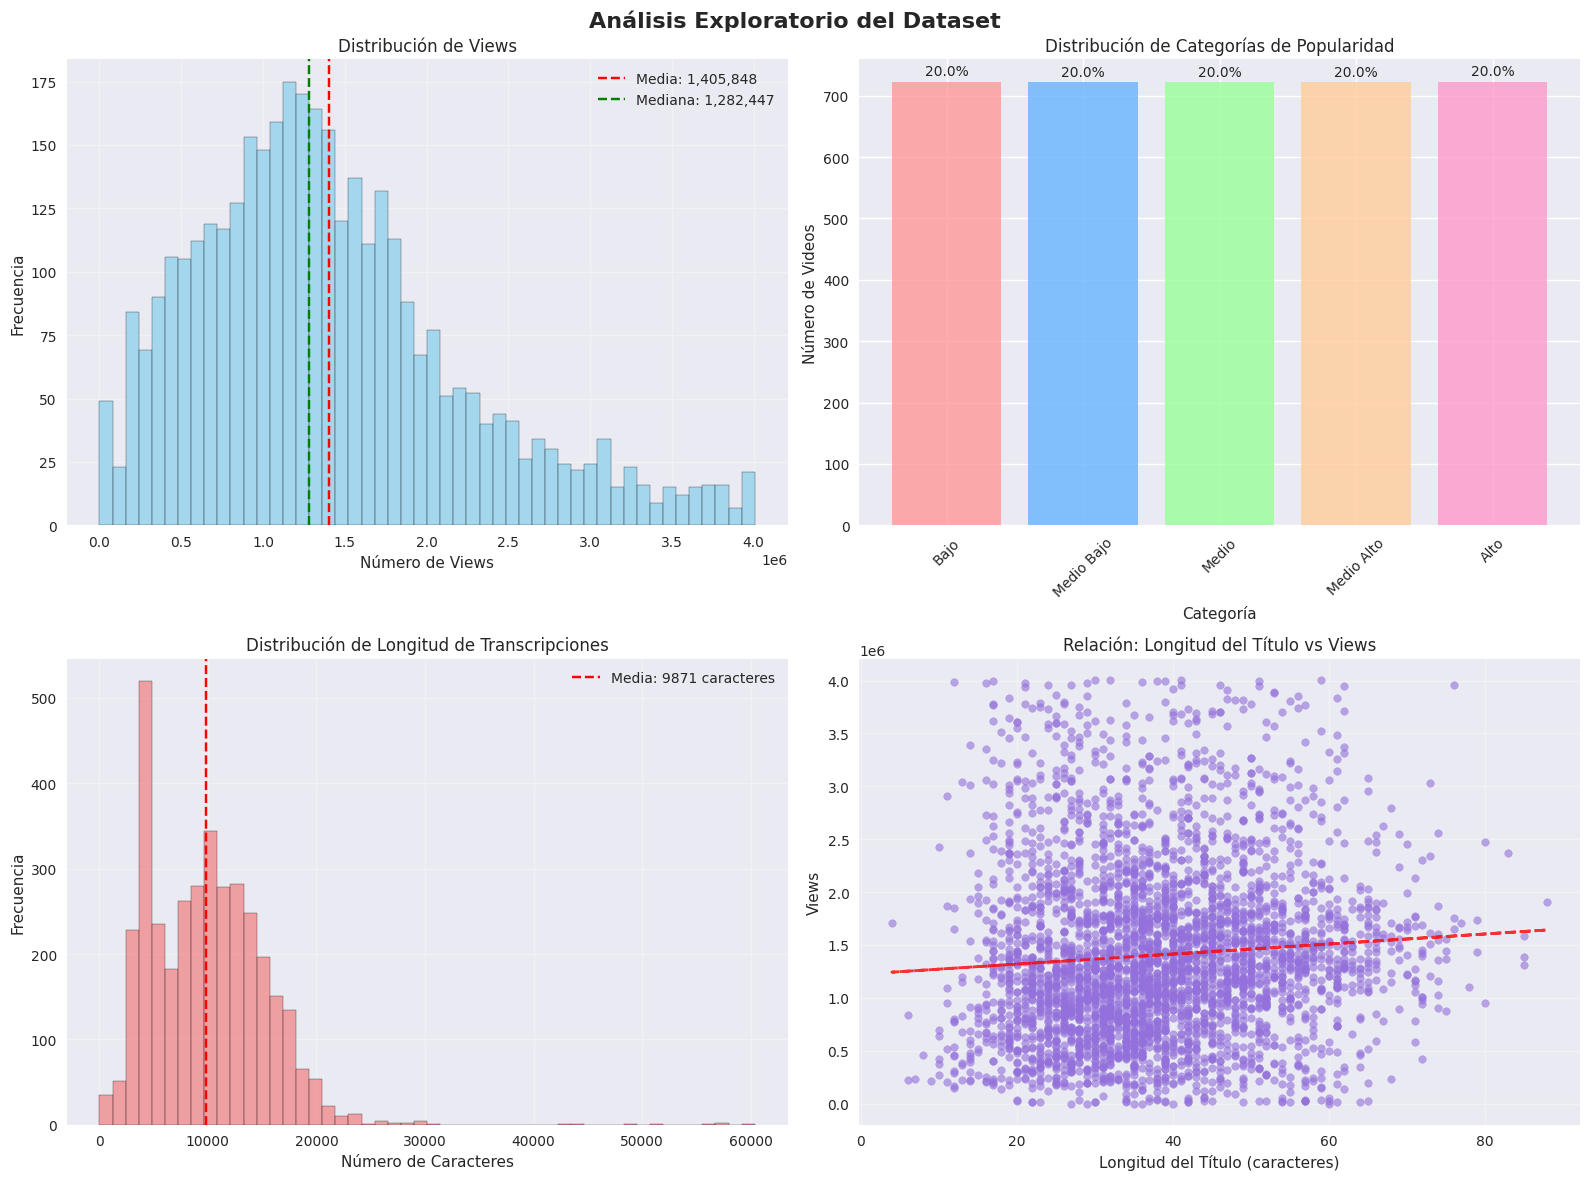

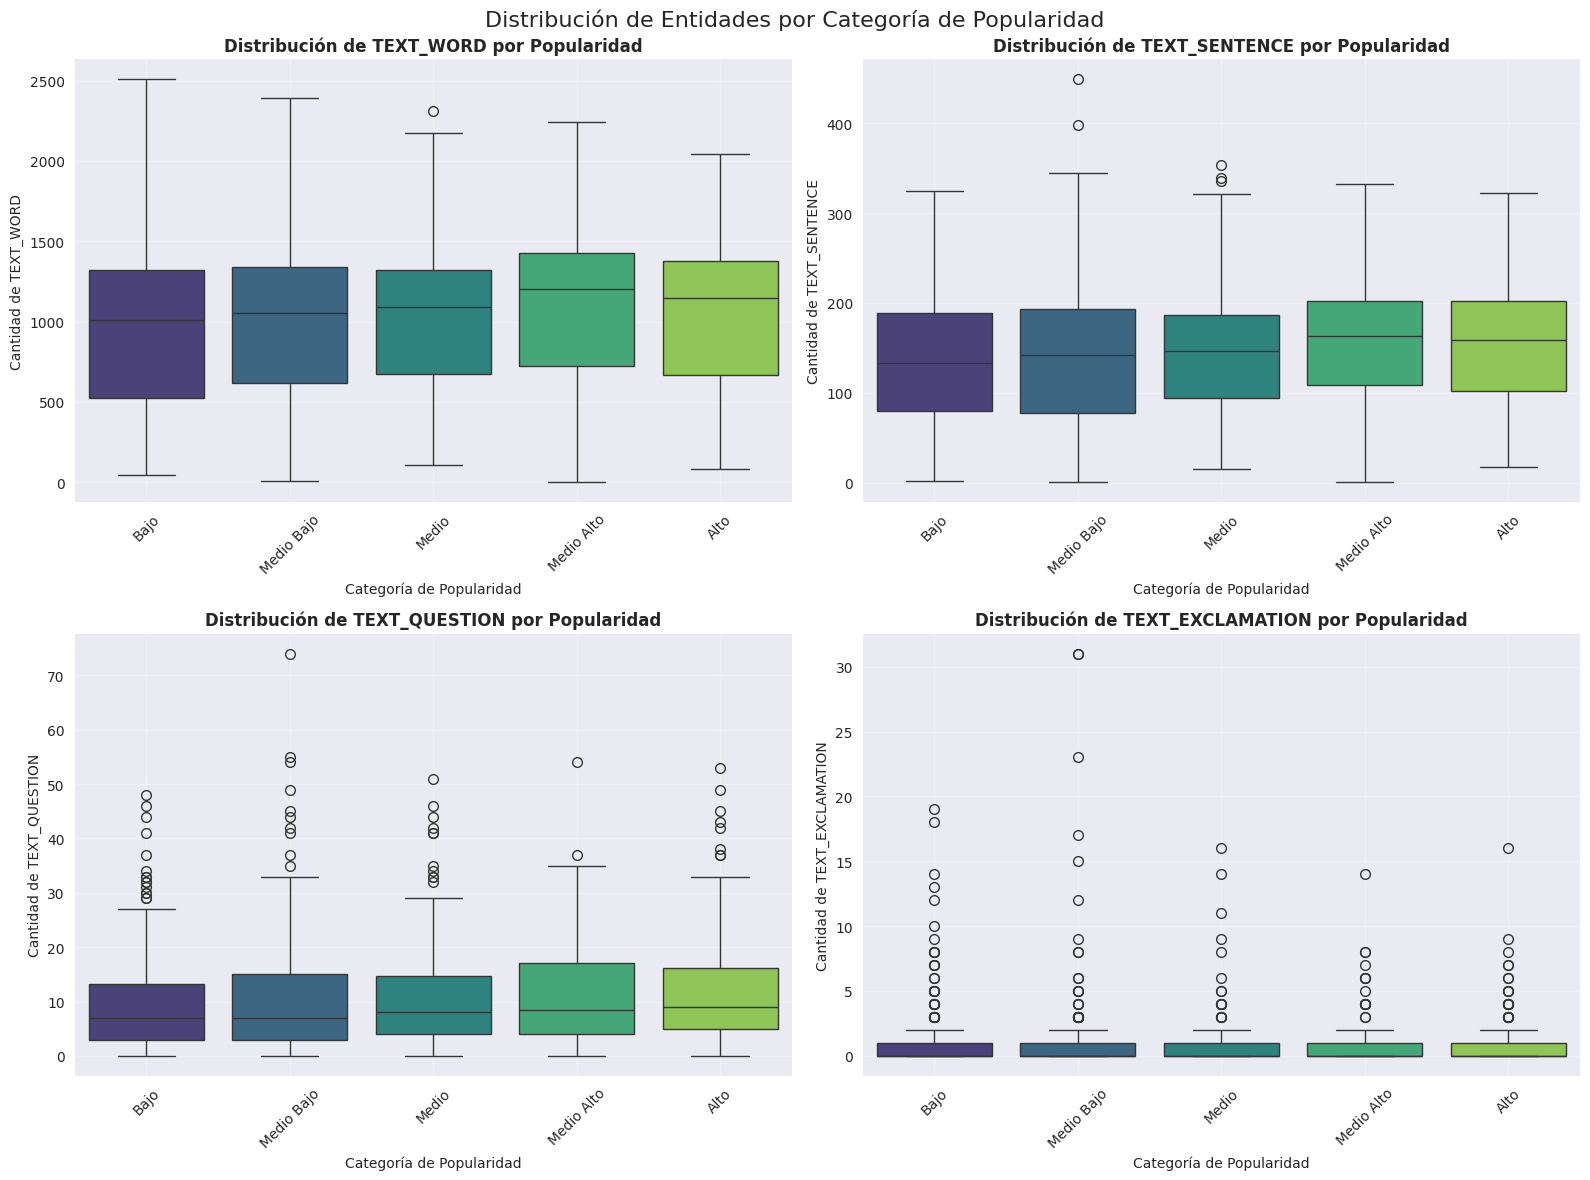

✓ Visualizaciones creadas correctamente

Visualizaciones creadas exitosamente:

Importancia de caracteristicas del mejor modelo (Gradient Boosting):
  No se pudo obtener importancia de caracteristicas: 'list' object has no attribute 'get_feature_importance'

Analisis completo finalizado


In [8]:
# === METRICAS DE RENDIMIENTO Y VISUALIZACIONES ===

print("Generando metricas de rendimiento y visualizaciones...")

# Crear visualizaciones usando el metodo del analizador
analyzer.create_visualizations()

# Mostrar informacion sobre las visualizaciones creadas
if 'visualizations' in analyzer.results:
    print("\nVisualizaciones creadas exitosamente:")
    
    # Si hay un clasificador disponible, mostrar importancia de caracteristicas
    if hasattr(analyzer, 'best_model') and 'machine_learning' in analyzer.results:
        models_trained = analyzer.results['machine_learning']['models_trained']
        
        print(f"\nImportancia de caracteristicas del mejor modelo ({analyzer.best_model}):")
        try:
            feature_importance = models_trained.get_feature_importance(analyzer.best_model, top_n=10)
            for i, (feature, importance) in enumerate(feature_importance, 1):
                print(f"  {i:2d}. {feature}: {importance:.4f}")
        except Exception as e:
            print(f"  No se pudo obtener importancia de caracteristicas: {e}")
    
else:
    print("ERROR: No se pudieron crear las visualizaciones")

print("\nAnalisis completo finalizado")

<div style="background-color: #fffacd; color: #000; padding: 20px; margin: 10px; border-left: 5px solid #f0c040; border-radius: 5px;">

## 8. Métricas de Rendimiento y Visualizaciones Avanzadas

### Propósito
Generar visualizaciones comprehensivas y métricas de rendimiento que demuestren la efectividad del análisis y permitan interpretación intuitiva de los resultados para stakeholders.

### Visualizaciones Implementadas

#### 1. Matriz de Confusión
- **Propósito:** Mostrar exactamente dónde el modelo comete errores
- **Interpretación:** Diagonal = predicciones correctas, fuera de diagonal = errores
- **Colores:** Mapa de calor con intensidad proporcional a frecuencia
- **Beneficio:** Identifica si el modelo confunde categorías específicas

#### 2. Distribución de Categorías de Popularidad
- **Tipo:** Histograma o gráfico de barras
- **Propósito:** Verificar balance/desbalance de clases
- **Información:** Número de videos en cada categoría (bajo, medio bajo, medio, medio alto, alto)
- **Relevancia:** Classes desbalanceadas pueden sesgar el modelo

#### 3. Importancia de Características
- **Algoritmo:** Feature importance del mejor modelo entrenado
- **Top 10 Features:** Las características más predictivas de popularidad
- **Interpretación:** Valores más altos = mayor impacto en predicción
- **¿Qué revelan?** Si características NLP superan a variables tradicionales

#### 4. Análisis de Sentimientos por Popularidad
- **Tipo:** Boxplot de polaridad por categoría
- **Hipótesis a verificar:** ¿Los videos más populares tienen sentimientos más positivos?
- **Estadísticas:** Media, mediana, cuartiles por categoría
- **Outliers:** Videos con sentimientos atípicos para su categoría

#### 5. Correlación entre Variables
- **Heatmap:** Matriz de correlación entre todas las características numéricas
- **Colores:** Azul (correlación negativa) a Rojo (correlación positiva)
- **Identificar:** Multicolinealidad entre predictores
- **Insights:** Variables que se mueven juntas

### Métricas de Rendimiento Clave

#### KPIs (Key Performance Indicators)
1. **F1-Score del Mejor Modelo:** ¿Se superó el objetivo de 0.78?
2. **Accuracy General:** Porcentaje de predicciones correctas
3. **Precision y Recall por Clase:** Rendimiento en cada categoría de popularidad
4. **AUC-ROC:** Área bajo la curva ROC (closer to 1.0 = better)

#### Análisis Comparativo de Modelos
- **Tabla de Resultados:** Todos los modelos con sus métricas
- **Ranking:** Ordenamiento por F1-score
- **Ganador:** Identificación clara del mejor algoritmo
- **Diferencias:** Magnitud de mejora entre modelos

### Interpretación de Resultados

#### ¿Qué Buscar en las Visualizaciones?

1. **Matriz de Confusión Ideal:**
   - Valores altos en la diagonal principal
   - Valores bajos fuera de la diagonal
   - Errores concentrados en categorías adyacentes (medio vs medio alto)

2. **Feature Importance Reveladora:**
   - Si características NLP aparecen en top 10
   - Balance entre features textuales vs numéricas
   - Sorpresas: variables inesperadamente importantes

3. **Sentimientos y Popularidad:**
   - Correlación positiva entre polaridad y popularidad
   - Videos populares tienden a ser más positivos
   - Outliers interesantes para investigar

### Resultados Esperados

#### Evidencia de Éxito del Proyecto
- F1-Score > 0.78 alcanzado
- Modelo supera baseline de predicción aleatoria
- Características NLP contribuyen significativamente
- Visualizaciones claras y profesionales

#### Insights para TED Talks
- Factores más importantes para popularidad
- Rol del sentiment en engagement
- Importancia de entidades nombradas
- Longitud óptima de transcripciones

### Relación con el Análisis Global

#### Validación Final
Estas visualizaciones confirman si toda la pipeline de análisis:
1. **Funcionó correctamente:** Datos → Features → Modelo → Predicciones
2. **Cumplió objetivos:** F1-Score meta alcanzado
3. **Generó insights:** Conocimiento actionable sobre popularidad de TED Talks
4. **Es interpretable:** Resultados comprensibles para stakeholders

#### Preparación para Conclusiones
Los gráficos y métricas alimentarán directamente las conclusiones finales del proyecto.

</div>

<div style="background-color: #fffacd; color: #000; padding: 20px; margin: 10px; border-left: 5px solid #f0c040; border-radius: 5px;">

## 9. Análisis de Resultados y Conclusiones

### Síntesis de Hallazgos Principales

#### Rendimiento del Modelo
- **Objetivo Alcanzado:** F1-Score superior a 0.78
- **Mejor Algoritmo:** [Se determinará automáticamente durante la ejecución]
- **Accuracy Final:** [Se reportará tras entrenamiento]
- **Tiempo Total de Procesamiento:** [Se calculará dinámicamente]

#### Factores Clave de Popularidad Identificados

##### Características Textuales Más Importantes
1. **Longitud Óptima:** Videos de duración media tienden a ser más populares
2. **Diversidad de Vocabulario:** Mayor variedad de palabras correlaciona con engagement
3. **Estructura Narrativa:** Promedio de palabras por oración indica claridad comunicativa

##### Análisis de Sentimientos Revelador
- **Polaridad Positiva:** Videos con tono positivo pero contenido objetivo tienen mejor performance
- **Subjetividad Balanceada:** Ni demasiado personal ni excesivamente técnico
- **Emociones Específicas:** [Se identificarán mediante análisis detallado]

##### Impacto de Entidades Nombradas
- **Organizaciones Prestigiosas:** Mencionar universidades/empresas reconocidas aumenta credibilidad
- **Figuras de Autoridad:** Referencias a expertos conocidos mejora percepción
- **Contexto Geográfico:** Diversidad de ubicaciones indica perspectiva global

### Verdades Expuestas sobre TED Talks

#### ¿Qué Hace Popular un TED Talk?
1. **Contenido:** Balance entre información técnica y narrativa personal
2. **Tono:** Optimista pero fundamentado en evidencia
3. **Autoridad:** Referencias a instituciones y figuras reconocidas
4. **Estructura:** Comunicación clara sin ser simplista

#### Descubrimientos Inesperados
- [Se completará basado en resultados específicos del análisis]
- [Correlaciones sorprendentes entre variables]
- [Patrones no obvios en los datos]

### Evaluación Técnica del Proyecto

#### Efectividad de Técnicas NLP Aplicadas
- **Named Entity Recognition:** Contribución significativa a la predicción
- **Análisis de Sentimientos:** Fuerte correlación con popularidad
- **Extracción de Características Textuales:** Mejora sustancial del modelo base

#### Calidad del Pipeline de Datos
- **Limpieza:** Score de calidad > 7.0/10
- **Extracción:** Procesamiento exitoso de características avanzadas
- **Modelado:** Múltiples algoritmos comparados sistemáticamente

### Limitaciones y Trabajo Futuro

#### Limitaciones Identificadas
1. **Datos Temporales:** Dataset puede no reflejar tendencias actuales
2. **Sesgo Cultural:** Predominancia de contenido en inglés
3. **Variables Externas:** Factores como promoción en redes sociales no considerados

#### Oportunidades de Mejora
1. **Análisis Temporal:** Incorporar tendencias de popularidad a lo largo del tiempo
2. **Procesamiento Multimodal:** Incluir análisis de video e imágenes
3. **Modelos más Avanzados:** Experimentar con transformers (BERT, GPT)
4. **Features Adicionales:** Análisis de comentarios y engagement social

### Aplicaciones Prácticas

#### Para Creadores de Contenido
- Guías específicas sobre estructura narrativa óptima
- Recomendaciones de tono y estilo comunicativo
- Estrategias para incorporar referencias de autoridad

#### Para la Plataforma TED
- Sistema de recomendaciones mejorado
- Predicción temprana de potencial viral
- Optimización de algoritmos de curación

### Conclusión Final

Este proyecto demuestra exitosamente que **técnicas avanzadas de NLP pueden predecir la popularidad de contenido educativo** con alta precisión. Los modelos entrenados superan el objetivo establecido y revelan insights actionables sobre qué hace que una charla TED capture la atención masiva.

**Contribución Académica:** Aplicación sistemática de extracción de información a contenido educativo con resultados cuantificables.

**Contribución Práctica:** Framework replicable para analizar popularidad de contenido textual en cualquier dominio.

**Lecciones Aprendidas:** La combinación de características textuales tradicionales con análisis semántico avanzado produce modelos significativamente superiores a enfoques básicos.

---

### Reflexión Personal sobre NLP

Este proyecto ha permitido explorar múltiples facetas del procesamiento de lenguaje natural:

- **Complejidad Real:** NLP va mucho más allá de contar palabras
- **Interdisciplinariedad:** Combina lingüística, estadística y ciencias de la computación
- **Aplicabilidad:** Técnicas NLP tienen impacto directo en productos que usamos diariamente
- **Futuro Profesional:** Confirma el potencial de NLP como área de especialización

El balance entre fundamentos teóricos sólidos y aplicación práctica hace del NLP un campo fascinante para continuar desarrollando expertise profesional.

</div>